<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do MNIST classifier using numpy and python without CNN and just using plain neural networks. Parts covered in section:


*   Scaling the input - part F

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

np.random.seed(1)

# loading the mnist data into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# getting the first 1000 data and reshaping the dataset for the first 1000
# scaling the input to 255
img, labels = (x_train[0:1000].reshape(1000,28*28) / 255), y_train[0:1000]

# creating an array of zeros 
one_hot_labels = np.zeros((len(labels), 10))


# assigning 1 to where the label would be for that particular array
# for example, if the array 
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

import sys, numpy as np

test_img = x_test.reshape(len(x_test), 28*28) / 255
test_label = np.zeros((len(y_test), 10))

for i,l in enumerate(y_test):
    test_label[i][l] = 1

11493376/11490434 [==============================] - 0s 0us/step


## Do MNIST classifier using numpy and python without CNN and just using plain neural networks. Parts covered in section:


*   Mini batch - part A
*   Random weight initializations - part B
*   Data Augmentation - part C
*   Using 3 or more layers for training - part D
*   Using RELU activation function - part E
*   Using appropriate learning rate - part G
*   Testing and training accuracy | plotting results with confusion matrix - part H


Using TensorFlow backend.


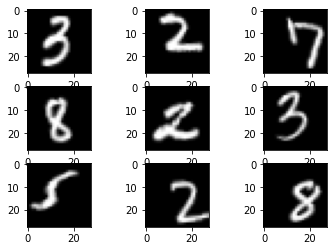

In [2]:
# Data augumentation
from keras.preprocessing.image import ImageDataGenerator

x_train = x_train.reshape(-1,28,28,1) # reshape the x_train dataset in 3 dimensions

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

from matplotlib import pyplot

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [3]:
# setting up relu activation function
# would return x if x > 0, else return 0
relu = lambda x: (x>0) * x

# setting up backprop for relu
# returns 1 if input > 0, else return 0
relu2deriv = lambda x: x >= 0

# learning rate
alpha = 0.001

# number of iterations
iterations = 200

# hidden size
hidden = 100

# pixels per image 
pixels = 28 * 28

# number of labels
num_labels = 10

# batch size
batch_size = 100

# weights from layer 0 to 1
# initialize random weights
weights_0_1 = 0.2 * np.random.random((pixels, hidden)) - 0.1

# weights from layer 1 to 2
# initialize random weights
weights_1_2 = 0.2*np.random.random((hidden,num_labels)) - 0.1

test_err_np = np.array([])
test_acc_np = np.array([])
train_err_np = np.array([])
train_acc_np = np.array([])

# training
for j in range(iterations):
  error = 0.0
  correct_cnt = 0
 
  # iterating through each training image
  for i in range(int(len(img) / batch_size)):
    batch_start = i * batch_size
    batch_end = (i+1) * batch_size
    
    # layer 0
    layer_0 = img[batch_start : batch_end]
    # layer 1
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    # adding dropout mask
    dropout_mask = np.random.randint(2 , size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    # layer 2
    layer_2 = np.dot(layer_1, weights_1_2)

    # MSE between the predicted and actual label value
    error += np.sum((labels[batch_start : batch_end] - layer_2) ** 2)

    for k in range(batch_size):

      # counting how many times the model predicts correctly
      correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_end+k+1]))

      # difference predicted and actual 
      layer_2_delta = (labels[batch_start:batch_end] - layer_2) / batch_size

      # backprop & adjusting weights
      # adding dropout mask
      layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
      layer_1_delta *= dropout_mask

      weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
      # print(weights_0_1)

  
  if (j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0

    for i in range(len(test_img)):
      layer_0 = test_img[i:i+1]
      layer_1 = relu(np.dot(layer_0, weights_0_1))
      layer_2 = np.dot(layer_1, weights_1_2)


      test_error += np.sum((test_label[i:i+1] - layer_2) ** 2)
      test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_label[i:i+1]))
      
    test_err_np = np.append(test_err_np, [test_error/ float(len(test_img))])
    test_acc_np = np.append(test_acc_np, [test_correct_cnt / float(len(test_img))])
    train_err_np = np.append(train_err_np, [error/float(len(img))])
    train_acc_np = np.append(train_acc_np, [correct_cnt/float(len(img))])
    sys.stdout.write("\n I:"+str(j)+ \
                     " Test-Error:" + str(test_error/ float(len(test_img)))[0:5] +\
                     " Test-Accuracy:" + str(test_correct_cnt/ float(len(test_img)))+\
                     " Train-Error:" + str(error/float(len(img)))[0:5] +\
                     " Train-Accuracy:" + str(correct_cnt/float(len(img))))
    # print(str(test_error/ float(len(test_img)))[0:5])


 I:0 Test-Error:0.822 Test-Accuracy:0.3551 Train-Error:1.268 Train-Accuracy:0.166
 I:10 Test-Error:0.566 Test-Accuracy:0.7089 Train-Error:0.597 Train-Accuracy:0.677
 I:20 Test-Error:0.502 Test-Accuracy:0.7507 Train-Error:0.529 Train-Accuracy:0.733
 I:30 Test-Error:0.472 Test-Accuracy:0.7717 Train-Error:0.478 Train-Accuracy:0.761
 I:40 Test-Error:0.452 Test-Accuracy:0.789 Train-Error:0.467 Train-Accuracy:0.79
 I:50 Test-Error:0.451 Test-Accuracy:0.7916 Train-Error:0.455 Train-Accuracy:0.781
 I:60 Test-Error:0.447 Test-Accuracy:0.7978 Train-Error:0.462 Train-Accuracy:0.784
 I:70 Test-Error:0.434 Test-Accuracy:0.8055 Train-Error:0.429 Train-Accuracy:0.815
 I:80 Test-Error:0.437 Test-Accuracy:0.8037 Train-Error:0.447 Train-Accuracy:0.791
 I:90 Test-Error:0.431 Test-Accuracy:0.808 Train-Error:0.428 Train-Accuracy:0.825
 I:100 Test-Error:0.428 Test-Accuracy:0.8085 Train-Error:0.423 Train-Accuracy:0.813
 I:110 Test-Error:0.427 Test-Accuracy:0.8086 Train-Error:0.425 Train-Accuracy:0.82
 I:120

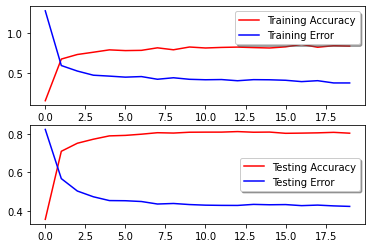

In [4]:
# Plotting results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
ax[0].plot(train_acc_np, color='r', label="Training Accuracy")
ax[0].plot(train_err_np, color='b', label="Training Error")
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(test_acc_np, color='r', label="Testing Accuracy")
ax[1].plot(test_err_np, color='b', label="Testing Error")
legend = ax[1].legend(loc='best', shadow=True)




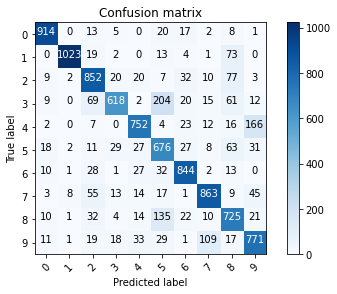

In [5]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to predict the test images
# Returns an array of the predicted labels
def predict():
  result = np.array([])
  for i in range(len(test_img)):
    layer_0 = test_img[i:i+1]
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weights_1_2)

    result = np.append(result, np.argmax(layer_2))
  return result

# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = predict()

# Correct labels 
Y_true = y_test

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [6]:
confusion_mtx


array([[ 914,    0,   13,    5,    0,   20,   17,    2,    8,    1],
       [   0, 1023,   19,    2,    0,   13,    4,    1,   73,    0],
       [   9,    2,  852,   20,   20,    7,   32,   10,   77,    3],
       [   9,    0,   69,  618,    2,  204,   20,   15,   61,   12],
       [   2,    0,    7,    0,  752,    4,   23,   12,   16,  166],
       [  18,    2,   11,   29,   27,  676,   27,    8,   63,   31],
       [  10,    1,   28,    1,   27,   32,  844,    2,   13,    0],
       [   3,    8,   55,   13,   14,   17,    1,  863,    9,   45],
       [  10,    1,   32,    4,   14,  135,   22,   10,  725,   21],
       [  11,    1,   19,   18,   33,   29,    1,  109,   17,  771]])

## Top Common Errors - part I

In [7]:
np.diagonal(confusion_mtx)

array([ 914, 1023,  852,  618,  752,  676,  844,  863,  725,  771])

In [9]:
np.take(Y_pred_errors, Y_true_errors)

NameError: ignored

In [10]:
errors = (Y_pred - Y_true != 0)
Y_pred[errors]

array([6., 2., 2., ..., 8., 5., 8.])

In [0]:
errors

In [0]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred) 
Y_pred_classes

[6. 2. 2. ... 8. 5. 8.]
[2. 4. 3. ... 7. 6. 4.]
[ 4. -2. -1. ...  1. -1.  4.]
[ 212 1012  968 ... 1652 1701 1644]


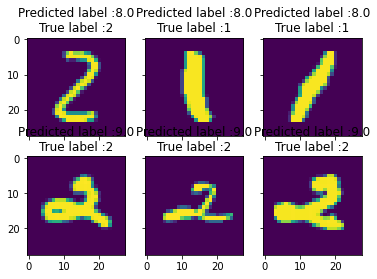

In [11]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred - Y_true != 0)

#Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
# X_val_errors = X_val[errors]
test_img_errors = test_img[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1



# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = Y_pred_errors
print(Y_pred_errors_prob)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.take(Y_pred_errors, Y_true_errors)
print(true_prob_errors)

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
# delta_pred_true_errors = Y_pred_errors_prob
print(delta_pred_true_errors)

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
print(sorted_dela_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
# display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
display_errors(most_important_errors, test_img_errors, Y_pred_errors, Y_true_errors)